# **Practical 7:** Implement Simple Linear Regression using your own set of data in Python.

## Reading a CSV File:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [4]:
data.shape

(30, 2)

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 46)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

25478.40725870498


In [13]:
print(regressor.coef_)

[9546.74920142]


In [14]:
y_pred = regressor.predict(X_test)
y_pred

array([ 37889.18122055,  62710.72914424, 123809.92403332,  44571.90566154,
        63665.40406438, 108535.12531105,  46481.25550183,  93260.32658878,
        60801.37930395, 111399.15007148,  56028.00470325,  54118.65486296])

In [15]:
y_test

array([ 46205.,  63218., 122391.,  43525.,  56957., 109431.,  39891.,
        98273.,  57189., 105582.,  54445.,  60150.])

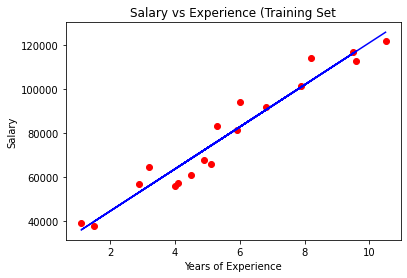

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
regressor.score(X_train, y_train)*100

94.49268281635882

In [18]:
regressor.score(X_test, y_test)*100

97.04699973789536

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

22721225.72239689

In [20]:
rmse = np.sqrt(mse)
rmse

4766.67868881435

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mae

3961.6671843472236

In [22]:
rsq = (r2_score(y_test, y_pred)*100)
rsq

97.04699973789536